<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10402412, Diego Oliveira Aluizio' #@param {type:"string"}
Aluno2 = '10396490, Jônatas Garcia de Oliveira' #@param {type:"string"}
Aluno3 = '10403046, Livia Alabarse' #@param {type:"string"}
Aluno4 = '10403028, Marina Scabello Martin' #@param {type:"string"}
Aluno5 = '10265432, Pedro Henrique Araujo Farias' #@param {type:"string"}

# **Resumo**

A tarefa inicial do projeto foi a modelagem do grafo e sua visualização.
Para a modelagem, consideramos **12 das cidades mais populosas do estado de São Paulo**. Por fim, foi definido o algoritmo de busca informada que será estudado e implementado.

# **Implementação**




## **1. Grafo das cidades (2,0)**

###**Definição do grafo e levantamento de dados**

Selecionamos **12 das cidades mais populosas do estado de São Paulo** como vértices do grafo. Para determinar as arestas que conectam os vértices, selecionamos as **três cidades mais próximas de cada cidade**. O custo das arestas é a **distância (em inteiros) entre as cidades, em km, considerando um trajeto de carro, segundo o Google Maps**.

Para representar o grafo, utilizamos a variável `tree` para armazenar os vértices das cidades, bem como uma lista com suas cidades vizinhas mais próximas, indicando as arestas a serem estabelecidas entre os vértices: `cidade: [vizinha01, vizinha02, vizinha03]`.

Vale notar que, como se trata de um grafo não direcionado, caso exista a aresta `(cidade01, cidade02)`, a aresta `(cidade02, cidade01)` será **omitida**.

Para atribuir as distâncias correspondentes a cada rota, ou seja, o custo das arestas, foi criado um dicionário `distance` com tuplas da seguinte forma: `(cidade_origem, cidade_destino): distância_em_km`.

In [ ]:
tree = {
    'São Paulo': ['Guarulhos', 'Osasco', 'São Bernardo do Campo'],
    'Guarulhos': ['Osasco', 'São Bernardo do Campo'],
    'Campinas': ['Jundiaí', 'Sorocaba', 'Barueri'],
    'São Bernardo do Campo': ['Santo André'],
    'Santo André': ['São Paulo', 'Guarulhos'],
    'Osasco': ['Barueri'],
    'Sorocaba': ['Barueri', 'Osasco'],
    'Ribeirão Preto': ['Campinas', 'Jundiaí'],
    'São José dos Campos': ['Guarulhos', 'São Paulo'],
    'Santos': ['São Bernardo do Campo', 'Santo André', 'São Paulo'],
    'Barueri': ['São Paulo', 'Guarulhos'],
    'Jundiaí': ['Osasco', 'Barueri']
}

distances = {
    ('São Paulo', 'Guarulhos'): 21,
    ('São Paulo', 'Osasco'): 21,
    ('São Paulo', 'São Bernardo do Campo'): 22,
    ('Guarulhos', 'Osasco'): 35,
    ('Guarulhos', 'São Bernardo do Campo'): 36,
    ('Campinas', 'Jundiaí'): 40,
    ('Campinas', 'Sorocaba'): 88,
    ('Campinas', 'Barueri'): 92,
    ('São Bernardo do Campo', 'Santo André'): 9,
    ('Santo André', 'São Paulo'): 26,
    ('Santo André', 'Guarulhos'): 42,
    ('Osasco', 'Barueri'): 12,
    ('Sorocaba', 'Barueri'): 74,
    ('Sorocaba', 'Osasco'): 84,
    ('Ribeirão Preto', 'Campinas'): 224,
    ('Ribeirão Preto', 'Jundiaí'): 260,
    ('São José dos Campos', 'Guarulhos'): 76,
    ('São José dos Campos', 'São Paulo'): 91,
    ('Santos', 'São Bernardo do Campo'): 66,
    ('Santos', 'Santo André'): 74,
    ('Santos', 'São Paulo'): 81,
    ('Barueri', 'São Paulo'): 38,
    ('Barueri', 'Guarulhos'): 45,
    ('Jundiaí', 'Barueri'): 53,
    ('Jundiaí', 'Osasco'): 55
}

###**Criação do Grafo**

Para criação do Grafo utilizamos as estruturas definidas anteriormente.

Cada "chave" do dicionário possui uma sequência de itens "filhos", simbolizando as arestas do grafo, e as distâncias são adicionadas acessando a posição correspondente da aresta na estrutura de distância.

Um novo grafo `G` é gerado utilizando a chamada `nx.Graph()`. Iterando pelas estruturas `tree` e `distances`, adicionamos os vértices e arestas ao grafo `G`.

Em seguida, o grafo é desenhado utilizando as funções da biblioteca `networkx`.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plottree(tree, distances):
  G = nx.Graph()

  for parent, children in tree.items():
      for child in children:
          G.add_edge(parent, child, weight=distances[(parent, child)])

  pos = nx.spring_layout(G)
  plt.figure(figsize=(10, 8))
  nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000,
          node_color='lightblue', font_size=10, font_weight='bold')

  edge_labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

  plt.show()

## **1.1. Resultados (Testes)**

Após alguns testes para o grafo em questão, a visualização mais clara dos dados foi dada pelo layout **spring** (`nx.spring_layout`).

Note que o tamanho das arestas na visualização não é proporcional ao custo (distância) associado.

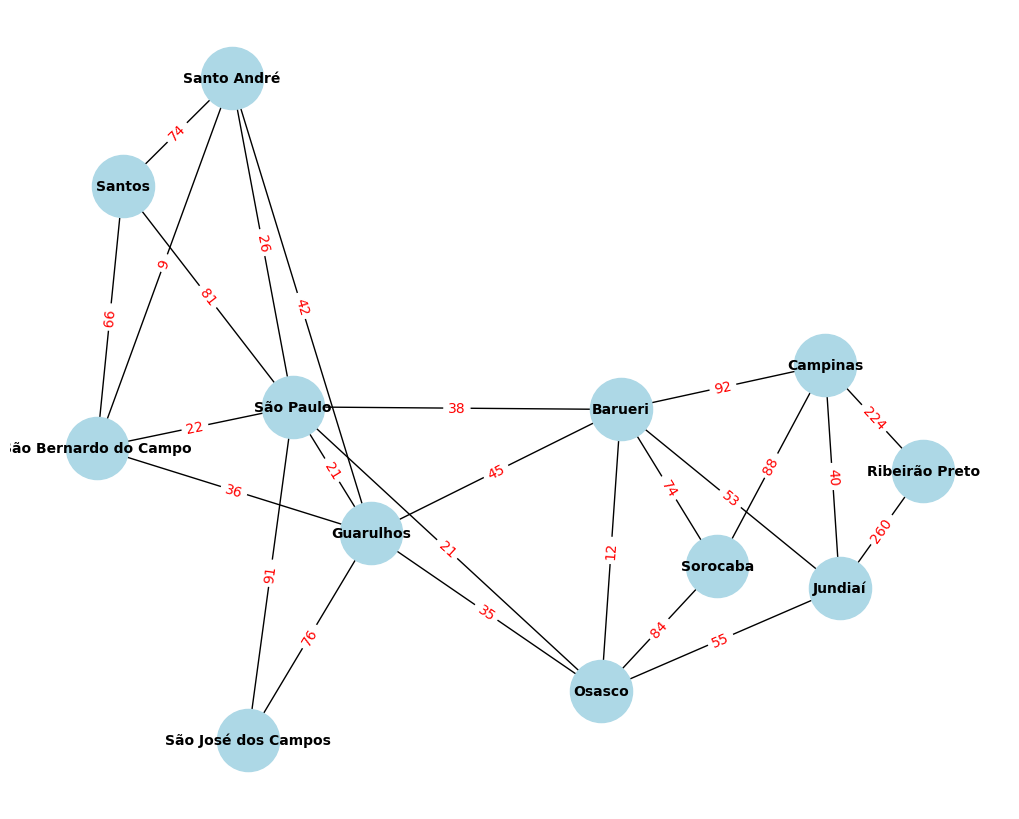

In [ ]:
plottree(tree, distances)

## **2. BFS, Breadth-First Search (3,0)**

In [ ]:
def make_undirected(tree):
    undirected_tree = {}

    for node, neighbors in tree.items():
        if node not in undirected_tree:
            undirected_tree[node] = set()
        for neighbor in neighbors:
            undirected_tree[node].add(neighbor)
            if neighbor not in undirected_tree:
                undirected_tree[neighbor] = set()
            undirected_tree[neighbor].add(node)

    return {node: list(neighbors) for node, neighbors in undirected_tree.items()}



O algoritmo de BFS foi construido usando como base o algortitmo de DSF providenciado no Colab de aula com algumas alterações chave. Inicialmente temos a função "make_undirected" que serve para transformar a representação do nosso grafo em uma mais legível pelo algoritmo do BFS



In [ ]:
from collections import deque

def bfs(tree, start):
    tree = make_undirected(tree)
    visited = set()  # Conjunto para armazenar nós já visitados
    queue = deque([start])
    path = []  # Lista para armazenar o caminho percorrido

    while queue:
        node = queue.popleft()  # Remove da frente da fila
        if node not in visited:
            visited.add(node)  # Marca o nó como visitado
            path.append(node)  # Adiciona o nó ao caminho
            print(f"\nExplorando vizinhos de: {node}")  # Mostra de qual nó estamos buscando vizinhos

            for neighbor in tree[node]:  # Para cada vizinho do nó atual
                if neighbor not in visited and neighbor not in queue:  # Evita repetição
                    print(f"  Adicionando {neighbor} à fila")
                    queue.append(neighbor)

    print("\nCaminho percorrido pelo BFS:", path)

O BFS (Busca em Largura) percorre um grafo camada por camada visitando todos os vizinhos de um nó antes de avançar.

- O algoritmo inicia com um vértice, usa uma fila para armazenar os nós a serem explorados e um conjunto para marcar os visitados.
- Retira o primeiro nó da fila, marca como visitado e adiciona seus vizinhos ainda não explorados.
- Repete o processo até a fila esvaziar, garantindo que percorre todos os nós possíveis. Durante a execução, exibe qual nó está sendo processado e quais vizinhos foram adicionados.

> ## **2.1. Resultados (Testes)**

Primeiro teste com o vértice de início em São Paulo

In [ ]:
bfs(tree, "São Paulo")


Explorando vizinhos de: São Paulo
  Adicionando Guarulhos à fila
  Adicionando Santos à fila
  Adicionando Barueri à fila
  Adicionando São Bernardo do Campo à fila
  Adicionando São José dos Campos à fila
  Adicionando Osasco à fila
  Adicionando Santo André à fila

Explorando vizinhos de: Guarulhos

Explorando vizinhos de: Santos

Explorando vizinhos de: Barueri
  Adicionando Sorocaba à fila
  Adicionando Campinas à fila
  Adicionando Jundiaí à fila

Explorando vizinhos de: São Bernardo do Campo

Explorando vizinhos de: São José dos Campos

Explorando vizinhos de: Osasco

Explorando vizinhos de: Santo André

Explorando vizinhos de: Sorocaba

Explorando vizinhos de: Campinas
  Adicionando Ribeirão Preto à fila

Explorando vizinhos de: Jundiaí

Explorando vizinhos de: Ribeirão Preto

Caminho percorrido pelo BFS: ['São Paulo', 'Guarulhos', 'Santos', 'Barueri', 'São Bernardo do Campo', 'São José dos Campos', 'Osasco', 'Santo André', 'Sorocaba', 'Campinas', 'Jundiaí', 'Ribeirão Preto']


Segundo teste com o vértice de início em Campinas



In [ ]:
bfs(tree, "Campinas")


Explorando vizinhos de: Campinas
  Adicionando Barueri à fila
  Adicionando Ribeirão Preto à fila
  Adicionando Sorocaba à fila
  Adicionando Jundiaí à fila

Explorando vizinhos de: Barueri
  Adicionando Guarulhos à fila
  Adicionando Osasco à fila
  Adicionando São Paulo à fila

Explorando vizinhos de: Ribeirão Preto

Explorando vizinhos de: Sorocaba

Explorando vizinhos de: Jundiaí

Explorando vizinhos de: Guarulhos
  Adicionando São Bernardo do Campo à fila
  Adicionando São José dos Campos à fila
  Adicionando Santo André à fila

Explorando vizinhos de: Osasco

Explorando vizinhos de: São Paulo
  Adicionando Santos à fila

Explorando vizinhos de: São Bernardo do Campo

Explorando vizinhos de: São José dos Campos

Explorando vizinhos de: Santo André

Explorando vizinhos de: Santos

Caminho percorrido pelo BFS: ['Campinas', 'Barueri', 'Ribeirão Preto', 'Sorocaba', 'Jundiaí', 'Guarulhos', 'Osasco', 'São Paulo', 'São Bernardo do Campo', 'São José dos Campos', 'Santo André', 'Santos']


Terceiro teste com o vértice de início em Riberão Preto

In [ ]:
bfs(tree, "Ribeirão Preto")


Explorando vizinhos de: Ribeirão Preto
  Adicionando Campinas à fila
  Adicionando Jundiaí à fila

Explorando vizinhos de: Campinas
  Adicionando Barueri à fila
  Adicionando Sorocaba à fila

Explorando vizinhos de: Jundiaí
  Adicionando Osasco à fila

Explorando vizinhos de: Barueri
  Adicionando Guarulhos à fila
  Adicionando São Paulo à fila

Explorando vizinhos de: Sorocaba

Explorando vizinhos de: Osasco

Explorando vizinhos de: Guarulhos
  Adicionando São Bernardo do Campo à fila
  Adicionando São José dos Campos à fila
  Adicionando Santo André à fila

Explorando vizinhos de: São Paulo
  Adicionando Santos à fila

Explorando vizinhos de: São Bernardo do Campo

Explorando vizinhos de: São José dos Campos

Explorando vizinhos de: Santo André

Explorando vizinhos de: Santos

Caminho percorrido pelo BFS: ['Ribeirão Preto', 'Campinas', 'Jundiaí', 'Barueri', 'Sorocaba', 'Osasco', 'Guarulhos', 'São Paulo', 'São Bernardo do Campo', 'São José dos Campos', 'Santo André', 'Santos']


## **3. Busca Informada (5,0)**

O algoritmo de busca informada estudado e implementado nesta atividade será o **algoritmo A***.

Bem como outros algoritmos de busca informada, o A* tenta calcular o valor mínimo entre um ponto A e B. Para isso, faz uso de heurísticas.

**Algoritmo A***
- A princípio, todos os nós recebem valor infinito.
- O **cálculo de custo de um nó** é dado por `f_score = g_score + h_score`
  - **g_score** é a quantidade de posições que o algoritmo já percorreu;
  - **h_score** é uma estimativa de quantos passos são necessários para chegar ao destino final.
- A cada novo nó, o f_score dos nós adjacentes é calculado. Se o valor calculado for **menor** que o f_score atual do nó, esse valor será substituido.
- O algoritmo irá escolher o nó adjacente de **menor custo**.
- Quando o algoritmo está percorrendo um caminho cujo valor do nó seja **igual** ao de um nó de um outro caminho, o algoritmo irá **escolher o nó com o menor h_score**.
- O processo é repetido até alcançar o destino final.

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

> ## **3.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

# **Referências**

MANIPULAÇÃO DE GRAFOS EM PYTHON COM NETWORKX. Prof. Alexandre Levada, 2021. Disponível em: https://www.youtube.com/watch?v=PfT8_2sKReo&t=1s&ab_channel=Prof.AlexandreLevada. Acesso em: 17 mar. 2025.

ALGORITMO A* NO PYTHON - MELHOR CAMINHO - A ESTRELA. Hashtag Programação, 2021. Disponível em: https://www.youtube.com/watch?v=fTtYzHfGlyk&ab_channel=HashtagPrograma%C3%A7%C3%A3o. Acesso em: 17 mar. 2025.

HAGBERG, A.; SCHULT, D.; SWART, P. *NetworkX: Network Analysis in Python Reference*, 2004. Disponível em https://networkx.org/documentation/stable/reference/index.html. Acesso em: 19 mar. 2025.

---

In [ ]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 10 #@param {type:"slider", min:0, max:10, step:1}

BFS = 10 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 10 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 10 #@param {type:"slider", min:0, max:10, step:1}

Geral = 10 #@param {type:"slider", min:0, max:10, step:1}

In [ ]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.7
1,1115677,DANIEL HENRIQUE,7.7
